# Classification model evaluation
- Use 'Airline satisfaction' data
1.	Satisfaction: airline satisfaction level (satisfaction, neutral or dissatisfaction)
2.	Gender: gender of the passengers (female, male)
3.	Customer type: the customer type (loyal customer, disloyal customer)
4.	Age: the actual age of the passengers
5.	Type of travel: purpose of the flight of the passengers (personal travel, business travel)
6.	Class: travel class in the plane of the passengers (business, eco, eco plus)
7.	Flight distance: the flight distance of this journey
8.	Inflight wifi service: level of the inflight wifi service (0:not applicable;1-5)
9.	Departure/arrival time convenient: level of departure/arrival time convenience
10.	Gate location: convenience of gate location
11.	Food and drink: level of food and drink service
12.	Seat comfort: level of seat comfort
13.	Inflight entertainment: level of inflight entertainment
14.	Leg room: level of leg room 
15.	Baggage handling: level of baggage handling service
16.	Inflight service: level of inflight service
17.	Cleanliness: level of cleanliness
18.	Departure delay: minutes delayed when departure
19.	Arrival delay: minutes delayed when arrival

# Group Names: Gia Nhu Ly, Trang Tran, Maria Ocegueda, Breanne Jones, Jazmin Leyva

## 1. Drop rows if any of the variables have missing values. Create dummy variables from the following variables:
- Satisfaction, Gender, Customer Type, Age, Type of Travel, Class.

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('Airline Satisfaction.csv')
df.head(10)

,Satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Gate location,Food and drink,Seat comfort,Inflight entertainment,Leg room,Baggage handling,Inflight service,Cleanliness,Departure Delay,Arrival Delay
0,satisfied,Female,Loyal Customer,52,Business travel,Eco,160,5,4,4,3,3,5,5,5,5,5,50,44.0
1,satisfied,Female,Loyal Customer,43,Business travel,Business,2556,2,2,2,4,5,4,4,4,4,3,77,65.0
2,satisfied,Female,Loyal Customer,46,Business travel,Business,1744,2,2,2,3,4,4,4,4,4,4,28,14.0
3,satisfied,Female,Loyal Customer,47,Business travel,Eco,1235,4,1,1,5,5,3,4,3,3,4,29,19.0
4,neutral or dissatisfied,Female,Loyal Customer,33,Business travel,Business,325,2,5,5,1,4,2,2,2,2,4,18,7.0
5,satisfied,Female,Loyal Customer,60,Business travel,Business,451,1,1,1,5,4,5,5,5,5,5,117,113.0
6,satisfied,Male,Loyal Customer,60,Business travel,Business,612,4,4,4,2,5,5,5,5,5,5,21,49.0
7,satisfied,Female,Loyal Customer,22,Business travel,Eco,1521,4,1,1,4,4,4,4,1,5,4,3,13.0
8,neutral or dissatisfied,Male,Loyal Customer,22,Personal Travel,Eco,1846,4,5,4,5,5,5,4,4,4,5,40,68.0
9,neutral or dissatisfied,Male,Loyal Customer,12,Personal Travel,Eco,674,3,4,1,1,1,1,3,5,4,1,80,70.0


In [28]:
# Dropping rows with missing values
df.dropna(inplace=True)

In [29]:
#Creating dummy variables for Satisfaction, Gender, Customer Type, Age, Type of Travel, Class
dummy_variables = pd.get_dummies(df[['Satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class', 'Age']])

In [30]:
df = pd.concat([df, dummy_variables], axis=1)
df.head(10)

,Satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Gate location,...,Satisfaction_satisfied,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,satisfied,Female,Loyal Customer,52,Business travel,Eco,160,5,4,4,...,1,1,0,1,0,1,0,0,1,0
1,satisfied,Female,Loyal Customer,43,Business travel,Business,2556,2,2,2,...,1,1,0,1,0,1,0,1,0,0
2,satisfied,Female,Loyal Customer,46,Business travel,Business,1744,2,2,2,...,1,1,0,1,0,1,0,1,0,0
3,satisfied,Female,Loyal Customer,47,Business travel,Eco,1235,4,1,1,...,1,1,0,1,0,1,0,0,1,0
4,neutral or dissatisfied,Female,Loyal Customer,33,Business travel,Business,325,2,5,5,...,0,1,0,1,0,1,0,1,0,0
5,satisfied,Female,Loyal Customer,60,Business travel,Business,451,1,1,1,...,1,1,0,1,0,1,0,1,0,0
6,satisfied,Male,Loyal Customer,60,Business travel,Business,612,4,4,4,...,1,0,1,1,0,1,0,1,0,0
7,satisfied,Female,Loyal Customer,22,Business travel,Eco,1521,4,1,1,...,1,1,0,1,0,1,0,0,1,0
8,neutral or dissatisfied,Male,Loyal Customer,22,Personal Travel,Eco,1846,4,5,4,...,0,0,1,1,0,0,1,0,1,0
9,neutral or dissatisfied,Male,Loyal Customer,12,Personal Travel,Eco,674,3,4,1,...,0,0,1,1,0,0,1,0,1,0


In [31]:
df.drop(['Satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class'], axis=1, inplace=True)
df.head(10)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Gate location,Food and drink,Seat comfort,Inflight entertainment,Leg room,Baggage handling,...,Satisfaction_satisfied,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,52,160,5,4,4,3,3,5,5,5,...,1,1,0,1,0,1,0,0,1,0
1,43,2556,2,2,2,4,5,4,4,4,...,1,1,0,1,0,1,0,1,0,0
2,46,1744,2,2,2,3,4,4,4,4,...,1,1,0,1,0,1,0,1,0,0
3,47,1235,4,1,1,5,5,3,4,3,...,1,1,0,1,0,1,0,0,1,0
4,33,325,2,5,5,1,4,2,2,2,...,0,1,0,1,0,1,0,1,0,0
5,60,451,1,1,1,5,4,5,5,5,...,1,1,0,1,0,1,0,1,0,0
6,60,612,4,4,4,2,5,5,5,5,...,1,0,1,1,0,1,0,1,0,0
7,22,1521,4,1,1,4,4,4,4,1,...,1,1,0,1,0,1,0,0,1,0
8,22,1846,4,5,4,5,5,5,4,4,...,0,0,1,1,0,0,1,0,1,0
9,12,674,3,4,1,1,1,1,3,5,...,0,0,1,1,0,0,1,0,1,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7937 entries, 0 to 7984
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age                                   7937 non-null   int64  
 1   Flight Distance                       7937 non-null   int64  
 2   Inflight wifi service                 7937 non-null   int64  
 3   Departure/Arrival time convenient     7937 non-null   int64  
 4   Gate location                         7937 non-null   int64  
 5   Food and drink                        7937 non-null   int64  
 6   Seat comfort                          7937 non-null   int64  
 7   Inflight entertainment                7937 non-null   int64  
 8   Leg room                              7937 non-null   int64  
 9   Baggage handling                      7937 non-null   int64  
 10  Inflight service                      7937 non-null   int64  
 11  Cleanliness      

## 2. (For M1) Define y and x1. Divide the data into 75% training and 25% test data and run the following logit models on the training data. Report confusion matrix, model accuracy, precision, recall, F1 score, and AUC on the test data.
- M1: y=satisfaction, x1=all other variables except 'leg room'.

In [33]:
#Define x, y
y1 = df.Satisfaction_satisfied
x1 = df[['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Gate location', 'Food and drink', 'Seat comfort', 'Inflight entertainment',
       'Baggage handling', 'Inflight service', 'Cleanliness', 'Departure Delay', 'Arrival Delay', 'Gender_Male', 'Customer Type_Loyal Customer', 
         'Type of Travel_Business travel', 'Class_Business', 'Class_Eco']]

In [34]:
#Create training and test data 
x1train, x1test, y1train, y1test=train_test_split(x1, y1, random_state=10)
m1 = LogisticRegression(random_state=10).fit(x1train, y1train)
m1.coef_

/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[-4.06710417e-03, -4.06710417e-03,  2.07502172e-04,
         8.30434570e-01, -4.22957063e-01, -4.07478864e-01,
        -3.29625473e-01,  1.82489927e-01,  3.69241129e-01,
        -8.86271417e-02, -9.08962208e-02,  4.39146180e-02,
        -1.77508573e-02,  7.93135607e-03, -1.06772986e-01,
         3.51786868e-03,  3.26050885e-01,  5.24521323e-01,
        -7.40048038e-01]])

In [35]:
#Report model accuracy, precision, recall, F1 score
pred1 = m1.predict(x1test)
m1.score(x1test, y1test)
print('Accuracy', metrics.accuracy_score(y1test, pred1))
print('Precision', metrics.precision_score(y1test, pred1))
print('Recall', metrics.recall_score(y1test, pred1))
print('F1 Score', metrics.f1_score(y1test, pred1))

Accuracy 0.816624685138539
Precision 0.7382465057179162
Recall 0.7861975642760487
F1 Score 0.7614678899082569


In [11]:
# Accuracy is significantly higher which indicates that it is a strong model since it produces close to accurate results

In [36]:
#Report confusion matrix
metrics.confusion_matrix(y1test, pred1)

array([[1040,  206],
       [ 158,  581]])

In [13]:
#The TN is high but TP is low. 
# TN = 1040
# FN = 158
# TP = 581
# FP = 206

In [37]:
#Report AUC1
prob1 = m1.predict_proba(x1test)[:, 1]
fpr1, tpr1, threshold1 = roc_curve(y1test, prob1)

roc_auc1 = auc(fpr1, tpr1)
print('Out-Sample AUC: %0.4f' % roc_auc1)

Out-Sample AUC: 0.8629


## 3. (For M2) Define y and x2. Divide the data into 75% training and 25% test data and run the following logit models on the training data. Report confusion matrix, model accuracy, precision, recall, F1 score, and AUC on the test data.
- M2: y=satisfaction, x2=all other variables except 'inflight wifi service'.

In [38]:
#Defining x and y
y2 = df.Satisfaction_satisfied
x2 = df[['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Gate location', 'Food and drink', 'Seat comfort', 
         'Inflight entertainment', 'Leg room', 'Baggage handling', 'Cleanliness', 'Departure Delay', 'Arrival Delay', 'Gender_Male', 'Customer Type_Loyal Customer', 
         'Type of Travel_Business travel', 'Class_Business', 'Class_Eco']]

In [39]:
#Create training and test data 
x2train, x2test, y2train, y2test=train_test_split(x2, y2, random_state=10)
m2 = LogisticRegression(random_state=10).fit(x2train, y2train)
m2.coef_

/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[-9.67702575e-03, -9.67702575e-03,  1.93851855e-04,
         1.13185840e+00, -5.68387385e-01, -5.50004952e-01,
        -4.70104854e-01,  2.26010867e-01,  4.33189010e-01,
         1.79967643e-01, -2.47907947e-01,  3.77945732e-02,
         1.90291049e-03, -5.09533428e-03, -1.55099628e-01,
         1.45193531e-03,  4.37551911e-01,  7.15792783e-01,
        -1.03282652e+00]])

In [40]:
#Report model accuracy, precision, recall, F1 score
pred2 = m2.predict(x2test)
m2.score(x2test, y2test)
print('Accuracy', metrics.accuracy_score(y2test, pred2))
print('Precision', metrics.precision_score(y2test, pred2))
print('Recall', metrics.recall_score(y2test, pred2))
print('F1 Score', metrics.f1_score(y2test, pred2))

Accuracy 0.8287153652392947
Precision 0.7424058323207776
Recall 0.8267929634641408
F1 Score 0.7823303457106273


In [18]:
# The Accuracy score is high which means it predicts the intances in the test data set more accurately 

In [19]:
# Precision is higher than the first model. As a result, F1 also increased.

In [20]:
#Report confusion matrix
metrics.confusion_matrix(y2test, pred2)

array([[1034,  212],
       [ 128,  611]])

In [41]:
#The TN is high but TP is low. 
# TN = 1034
# FN = 128
# TP = 611
# FP = 212

In [42]:
#Report AUC2
prob2 = m2.predict_proba(x2test)[:, 1]
fpr2, tpr2, threshold2 = roc_curve(y2test, prob2)

roc_auc2 = auc(fpr2, tpr2)
print('Out-Sample AUC: %0.4f' % roc_auc2)

Out-Sample AUC: 0.8747


## 4. Draw ROC curves with AUCs on the test data for the two models in one graph.

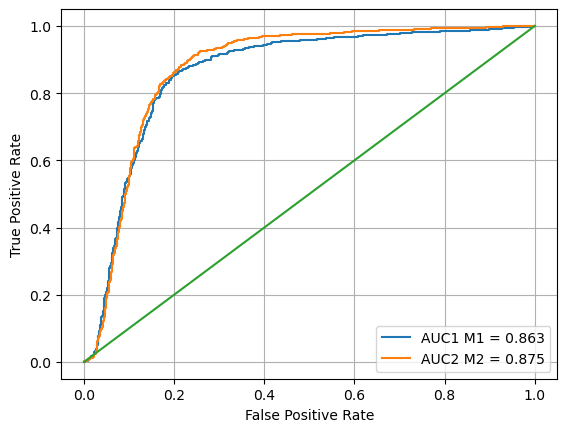

In [43]:
# Disply ROC curves
#We use our false positive rates and true positive rates as well as our
#Area Under the Curve findings from before to create our Area Under the Curve 
#graphs. Looking at the data, Model 2 performs better than M1 because 
#it has a higher Area under the curve. 
#Therefore we found that in-flight wifi provided a stronger model for airline
#satisfaction than leg room.

plt.plot(fpr1, tpr1, label='AUC1 M1 = %0.3f' % roc_auc1)
plt.plot(fpr2, tpr2, label='AUC2 M2 = %0.3f' % roc_auc2)
plt.plot([0, 1], [0, 1])
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

In [24]:
# Looking at the data, Model 2 performs better than M1 because it has a higher AUC. 